In [1]:

import numpy as np
import sys
import itertools as itertools
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import PercentFormatter
import matplotlib.colors as mcolors
import pandas as pd
from pathlib import Path
import pickle
from typing import Any

sys.path.append("..")
sys.path.append("../..")

from python.plot_utils import add_ons

In [2]:
def manual_colorbar(
    fig,
    cmap=plt.get_cmap("turbo"),
    norm=mcolors.Normalize(0, 40),
    position=[1.01, 0.07, 0.02, 0.92],
    cbar_ticks=[0, 8, 16, 24, 32, 40],
    cbar_ticklabels=[0, 8, 16, 24, 32, 40],
    tick_size=20,
    colorbar_label=r"$\mathcal{D}$",
    label_size=22,
    colorbar_pad=10,
    label_position='top'  # Adding an argument to specify the position of the label
):
    
    cax = fig.add_axes(position)  # [left, bottom, width, height]

    # Create the colorbar
    cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
    cbar.set_ticks(cbar_ticks)
    cbar.set_ticklabels(cbar_ticklabels)
    cbar.ax.tick_params(labelsize=tick_size)  # Adjust tick label size if needed
    cbar.ax.minorticks_off()
    
    # Move the label to the top
    cbar.ax.set_title(
        colorbar_label, fontsize=label_size, pad=colorbar_pad, loc="center"
    )
    
    return fig


def filter_file(f: Path, suffix: str) -> bool:
    return f.is_file() and (f.suffix == suffix) and f.stat().st_size > 0


def load_result(
    location: str = ".",
    conditions: list[str] | None = None,
    sort_values: list[str] = ["ZZ", "h"],
    verbose: bool = False,
) -> pd.DataFrame:

    # * Scan the result directory and gather result files
    result_dir = Path(f"{location}")

    # Recursively find all .pkl files in result_dir and subdirectories
    result_files = list(result_dir.rglob("*.pkl"))

    # * Read files
    results: list[dict[str, Any]] = []
    for it, file in enumerate(result_files):
        if verbose:
            print(f"{it} ", end="")
        
        if file.is_file():
            with open(file, "rb") as f:
                results.append(pickle.load(f))

    # * Concatenate to single dataframe
    df = pd.DataFrame(results)

    if verbose:
        print(f"\n")

    if conditions is None:
        if sort_values is None:
            return df
        else:
            return df.sort_values(by=sort_values, ascending=True)
    else:
        if verbose:
            print(f"Query in progress")
        for condition in conditions:
            df = df.query(condition)
    
        if len(df) > 0:
            if sort_values is None:
                return df
            else:
                return df.sort_values(by=sort_values, ascending=True)
        else:
            return None



In [3]:
location = f"numpy"
df = load_result(
    location,
    # sort_values = None,
)


In [4]:
df

,L,XY,ZZ,h,NKeep,NSweep,diag,Krylov,cutoff,two,ground_MPS,ground_state_energy,Neumann_entropy,ground_energies,spin_z,spin_correlations
9912,50,1.0,-5.0,-10.0,50,20,True,5,0.01,True,[],-311.25+0.00j,"[(7.688223609155783e-15+0j), (7.68822360915578...","[(-311.24999999999886+0j), (-311.2499999999983...","[(-0.49999999999999734+0j), (-0.49999999999999...","[(-0.7499999999999947+0j), (1.3322676295501877..."
9992,50,1.0,-5.0,-9.9,50,20,True,5,0.01,True,[],-308.75+0.00j,"[(7.688223609155783e-15+0j), (7.68822360915578...","[(-308.7499999999952+0j), (-308.7499999999965+...","[(-0.4999999999999973+0j), (-0.499999999999997...","[(-0.7499999999999944+0j), (1.3600232051658166..."
9991,50,1.0,-5.0,-9.8,50,20,True,5,0.01,True,[],-306.25+0.00j,"[(6.0865103572483304e-15+0j), (6.0865103572483...","[(-306.24999999999363+0j), (-306.2499999999926...","[(-0.4999999999999979+0j), (-0.499999999999997...","[(-0.7499999999999956+0j), (1.0547118733938987..."
9990,50,1.0,-5.0,-9.7,50,20,True,5,0.01,True,[],-303.75+0.00j,"[(4.4847971053408774e-15+0j), (4.4847971053408...","[(-303.7499999999932+0j), (-303.7499999999939+...","[(-0.49999999999999845+0j), (-0.49999999999999...","[(-0.7499999999999969+0j), (7.771561172376095e..."
9989,50,1.0,-5.0,-9.6,50,20,True,5,0.01,True,[],-301.25+0.00j,"[(4.4847971053408774e-15+0j), (4.4847971053408...","[(-301.2499999999945+0j), (-301.2499999999942+...","[(-0.49999999999999845+0j), (-0.49999999999999...","[(-0.7499999999999969+0j), (7.771561172376095e..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20408,50,1.0,5.0,9.7,50,20,True,5,0.01,True,[],-181.25+0.00j,"[0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0...","[(-181.24999999999983+0j), (-181.2499999999998...","[(0.5+0j), (0.5+0j), (0.5+0j), (0.5+0j), (0.5+...","[(0.25+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j..."
20409,50,1.0,5.0,9.8,50,20,True,5,0.01,True,[],-183.75+0.00j,"[0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0...","[(-183.75000000000017+0j), (-183.7500000000001...","[(0.5+0j), (0.5+0j), (0.5+0j), (0.5+0j), (0.5+...","[(0.25+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j..."
20410,50,1.0,5.0,9.9,50,20,True,5,0.01,True,[],-186.25+0.00j,"[0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0...","[(-186.2499999999999+0j), (-186.24999999999991...","[(0.5+0j), (0.5+0j), (0.5+0j), (0.5+0j), (0.5+...","[(0.25+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j..."
20330,50,1.0,5.0,10.0,50,20,True,5,0.01,True,[],-188.75+0.00j,"[0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0...","[(-188.75+0j), (-188.75+0j), (-188.75+0j), (-1...","[(0.5+0j), (0.5+0j), (0.5+0j), (0.5+0j), (0.5+...","[(0.25+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j..."


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.interpolate import griddata

def plot_pcolormesh(
    xdata,
    ydata,
    plotdata,
    method: str = "linear",
    vmin: float = -1,
    vmax: float = 1,
    x_label: str | None = None,
    y_label: str | None = None,
    cbar_label: str | None = None,
    fontsize: int = 12,
):

    fig, ax = plt.subplots(constrained_layout=True)

    # Create a grid for interpolation
    x_unique = np.unique(xdata)
    y_unique = np.unique(ydata)
    x_grid, y_grid = np.meshgrid(x_unique, y_unique)

    # Interpolate mu values onto the grid
    data_grid = griddata(
        points=(xdata, ydata),
        values= plotdata,
        xi=(x_grid, y_grid),
        method=method  # Using 'linear' as previously determined
    )

    # Debug: Check the range of data_grid
    print("data_grid min:", np.min(data_grid), "max:", np.max(data_grid))
    print("Any NaN in data_grid?:", np.isnan(data_grid).any())

    # Create a custom blue-white-red colormap
    # Define the colors: blue at -1, white at 0, red at 1
    colors = ['blue', 'white', 'red']
    positions = [0, 0.5, 1]  # Normalized positions: -1 maps to 0, 0 to 0.5, 1 to 1
    # custom_cmap = mcolors.LinearSegmentedColormap.from_list('blue_white_red', list(zip(positions, colors)))
    custom_cmap = "turbo"

    # Create the pcolormesh plot with the custom colormap
    # plt.figure(figsize=(8, 6))
    mesh = ax.pcolormesh(
        x_grid, y_grid, data_grid,
        cmap=custom_cmap,  # Use the custom blue-white-red colormap
        vmin=vmin, vmax=vmax,  # Set the colorbar range
        shading='auto'  # Automatically determine cell edges
    )
    cbar = fig.colorbar(mesh, extend='both')  # Extend to show out-of-range values
    if cbar_label is not None:
        cbar.set_label(label=cbar_label, fontsize=fontsize)
    
    if x_label is not None:
        ax.set_xlabel(x_label, fontsize=fontsize)
    if y_label is not None:
        ax.set_ylabel(y_label, fontsize=fontsize)

    ax.grid(True)
    
    fig, ax = add_ons(fig, ax)
    
    return fig, ax


In [6]:

L = df["L"].values[0]
NKeep = df["NKeep"].values[0]
ZZ = df["ZZ"].values.real
h = df['h'].values.real
ground_state_energy = df["ground_state_energy"].values.real
Neumann_entropy = np.array(df['Neumann_entropy'].to_list()).real
spin_z = np.array(df['spin_z'].to_list()).real
# spin_z = np.array([np.sum(np.array(f)) for f in df['spin_z']])
spin_correlations = np.array(df['spin_correlations'].to_list())

In [7]:
# spin_correlations[-100]

In [8]:
# plt.plot(spin_correlations[-100])
# # plt.xscale("log")
# # plt.yscale("log")

In [9]:
# plt.plot(np.abs(spin_correlations[-100]))
# plt.xscale("log")
# plt.yscale("log")

data_grid min: -6.225 max: -0.24499999999999905
Any NaN in data_grid?: False


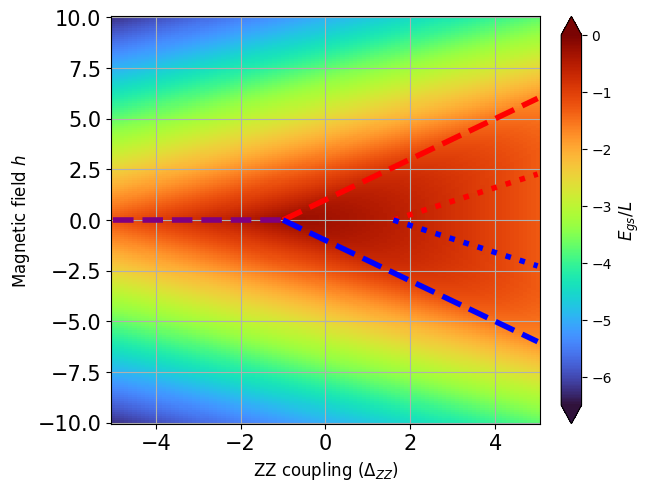

In [10]:
vmin = -6.5
vmax = 0

x_label = r'ZZ coupling ($\Delta_{ZZ}$)'
y_label = r'Magnetic field $h$'
cbar_label = r'$E_{gs}/L$'

fig, ax = plot_pcolormesh(
    xdata=ZZ,
    ydata=h,
    vmin = vmin,
    vmax = vmax,
    plotdata = ground_state_energy / L,
    x_label = x_label,
    y_label = y_label,
    cbar_label = cbar_label,
)

xlines = np.arange(-5, -1+0.1, 0.1)
ylines = 0 * xlines

ax.plot(xlines, ylines, linestyle="--", linewidth=4, color="purple")

xlines = np.arange(-1, 5+0.1, 0.1)

ax.plot(xlines, xlines+1, linestyle="--", linewidth=4, color="red")
ax.plot(xlines, -xlines-1, linestyle="--", linewidth=4, color="blue")

xlines = np.arange(1.6, 5+0.1, 0.1)
slope = 2/3

ax.plot(xlines, slope * (xlines - xlines[0]), linestyle=":", linewidth=4, color="red")
ax.plot(xlines, -slope * (xlines - xlines[0]), linestyle=":", linewidth=4, color="blue")

data_grid min: -0.5000000000000003 max: 0.5
Any NaN in data_grid?: False


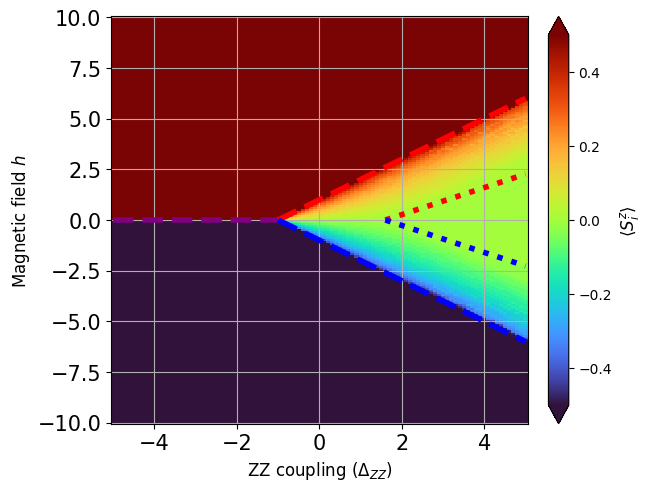

In [11]:
vmin = -0.5
vmax = 0.5

x_label = r'ZZ coupling ($\Delta_{ZZ}$)'
y_label = r'Magnetic field $h$'
cbar_label = r'$\langle S^z_i\rangle$'

fig, ax = plot_pcolormesh(
    xdata=ZZ,
    ydata=h,
    vmin = vmin,
    vmax = vmax,
    plotdata = spin_z.mean(axis=1),
    x_label = x_label,
    y_label = y_label,
    cbar_label = cbar_label,
)

xlines = np.arange(-5, -1+0.1, 0.1)
ylines = 0 * xlines

ax.plot(xlines, ylines, linestyle="--", linewidth=4, color="purple")

xlines = np.arange(-1, 5+0.1, 0.1)

ax.plot(xlines, xlines+1, linestyle="--", linewidth=4, color="red")
ax.plot(xlines, -xlines-1, linestyle="--", linewidth=4, color="blue")

xlines = np.arange(1.6, 5+0.1, 0.1)
slope = 2/3

ax.plot(xlines, slope * (xlines - xlines[0]), linestyle=":", linewidth=4, color="red")
ax.plot(xlines, -slope * (xlines - xlines[0]), linestyle=":", linewidth=4, color="blue")


data_grid min: -6.406853007629837e-16 max: 1.8819277291604337
Any NaN in data_grid?: False


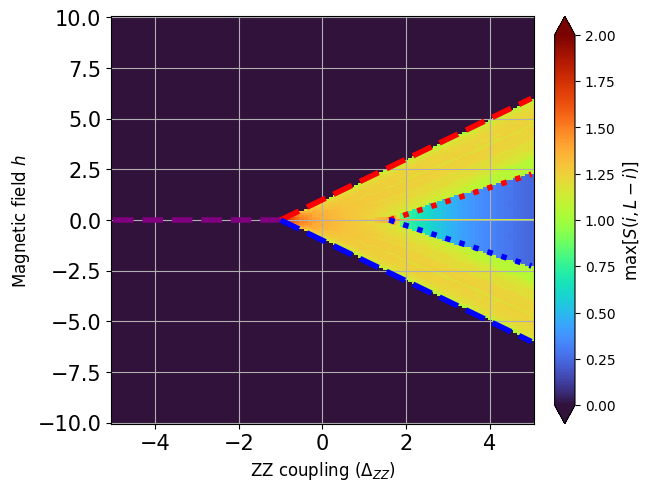

In [12]:
vmin = 0
vmax = 2

x_label = r'ZZ coupling ($\Delta_{ZZ}$)'
y_label = r'Magnetic field $h$'
cbar_label = r'$\mathrm{max}\left[S(i,L-i)\right]$'

fig, ax = plot_pcolormesh(
    xdata=ZZ,
    ydata=h,
    vmin = vmin,
    vmax = vmax,
    plotdata = Neumann_entropy.max(axis=1),
    x_label = x_label,
    y_label = y_label,
    cbar_label = cbar_label,
)

xlines = np.arange(-5, -1+0.1, 0.1)
ylines = 0 * xlines

ax.plot(xlines, ylines, linestyle="--", linewidth=4, color="purple")

xlines = np.arange(-1, 5+0.1, 0.1)

ax.plot(xlines, xlines+1, linestyle="--", linewidth=4, color="red")
ax.plot(xlines, -xlines-1, linestyle="--", linewidth=4, color="blue")

xlines = np.arange(1.6, 5+0.1, 0.1)
slope = 2/3

ax.plot(xlines, slope * (xlines - xlines[0]), linestyle=":", linewidth=4, color="red")
ax.plot(xlines, -slope * (xlines - xlines[0]), linestyle=":", linewidth=4, color="blue")


In [13]:
alter = np.array([(-1)**it for it in range(len(spin_z[0]))])

alter_spin_z = alter * spin_z

data_grid min: -0.4776397697991056 max: 0.4776397697990724
Any NaN in data_grid?: False


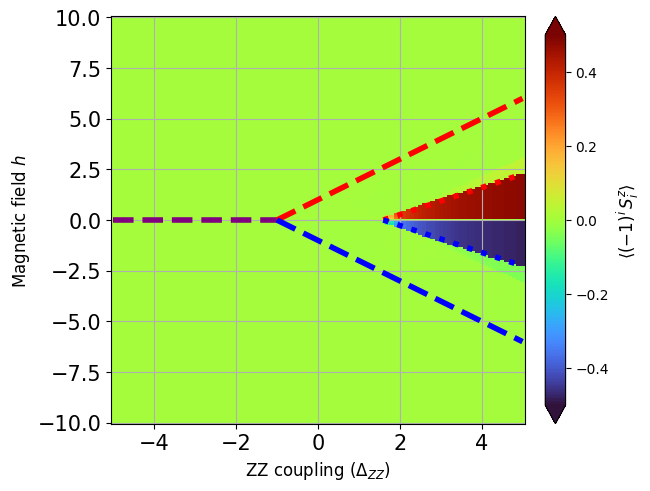

In [14]:
vmin = -0.5
vmax = 0.5

x_label = r'ZZ coupling ($\Delta_{ZZ}$)'
y_label = r'Magnetic field $h$'
cbar_label = r'$\langle (-1)^i\,S^z_i\rangle$'

fig, ax = plot_pcolormesh(
    xdata=ZZ,
    ydata=h,
    vmin = vmin,
    vmax = vmax,
    plotdata = alter_spin_z.mean(axis=1),
    x_label = x_label,
    y_label = y_label,
    cbar_label = cbar_label,
)

xlines = np.arange(-5, -1+0.1, 0.1)
ylines = 0 * xlines

ax.plot(xlines, ylines, linestyle="--", linewidth=4, color="purple")

xlines = np.arange(-1, 5+0.1, 0.1)

ax.plot(xlines, xlines+1, linestyle="--", linewidth=4, color="red")
ax.plot(xlines, -xlines-1, linestyle="--", linewidth=4, color="blue")

xlines = np.arange(1.6, 5+0.1, 0.1)
slope = 2/3

ax.plot(xlines, slope * (xlines - xlines[0]), linestyle=":", linewidth=4, color="red")
ax.plot(xlines, -slope * (xlines - xlines[0]), linestyle=":", linewidth=4, color="blue")


In [15]:
from matplotlib import cm
from matplotlib.colors import Normalize


def plot_datas_at_target(
    targets,
    params,
    datas,
    norm,
    plot_params = None,
    fig = None,
    ax = None,
    value: float = 0.0,
    tol: float = 1e-2,
    xlog: bool = False,
    ylog: bool = False,
    title: str | None = None,
    xlim: tuple | None = None,
    ylim: tuple | None = None,
    x_label: str | None = None,
    y_label: str | None = None,
    fontsize: int = 20,
    correlation: bool = True,
    cbar_label: str | None = None,
):
    # Set up the Turbo colormap and normalization for coloring lines based on param
    cmap = cm.turbo
    # norm = Normalize(vmin=vmin, vmax=vmax)

    if fig is None or ax is None:
        fig, ax = plt.subplots(constrained_layout=True)

    # Plot lines for each target within tolerance
    for target, param, data in zip(targets, params, datas):
        if np.abs(target - value) < tol:
            xrange = np.arange(1, len(data)+1)
            # Color the line based on normalized param value

            if correlation:
                if plot_params is None:
                    ax.errorbar(xrange[:-1], data[1:], color=cmap(norm(param)))
                else:
                    if param in plot_params:
                        ax.errorbar(xrange[:-1], data[1:], color=cmap(norm(param)))
            else:
                if plot_params is None:
                    ax.errorbar(xrange, data, color=cmap(norm(param)))
                else:
                    if param in plot_params:
                        ax.errorbar(xrange, data, color=cmap(norm(param)))

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # Apply log scaling if requested
    if xlog:
        ax.set_xscale("log")
    if ylog:
        ax.set_yscale("log")

    # Set axis labels if provided
    if x_label is not None:
        ax.set_xlabel(x_label, fontsize=fontsize,)
    if y_label is not None:
        ax.set_ylabel(y_label, fontsize=fontsize,)
    
    if title is not None:
        ax.set_title(title)
    
    fig, ax = add_ons(fig, ax,)
    
    return fig, ax



In [16]:
plot_params = np.array([round(-10 + it,2) for it in range(41)])
plot_params[0] in h

True

/home/sungbinlee/miniconda3/envs/latest/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/sungbinlee/miniconda3/envs/latest/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/sungbinlee/miniconda3/envs/latest/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/sungbinlee/miniconda3/envs/latest/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/sungbinlee/miniconda3/envs/latest/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/

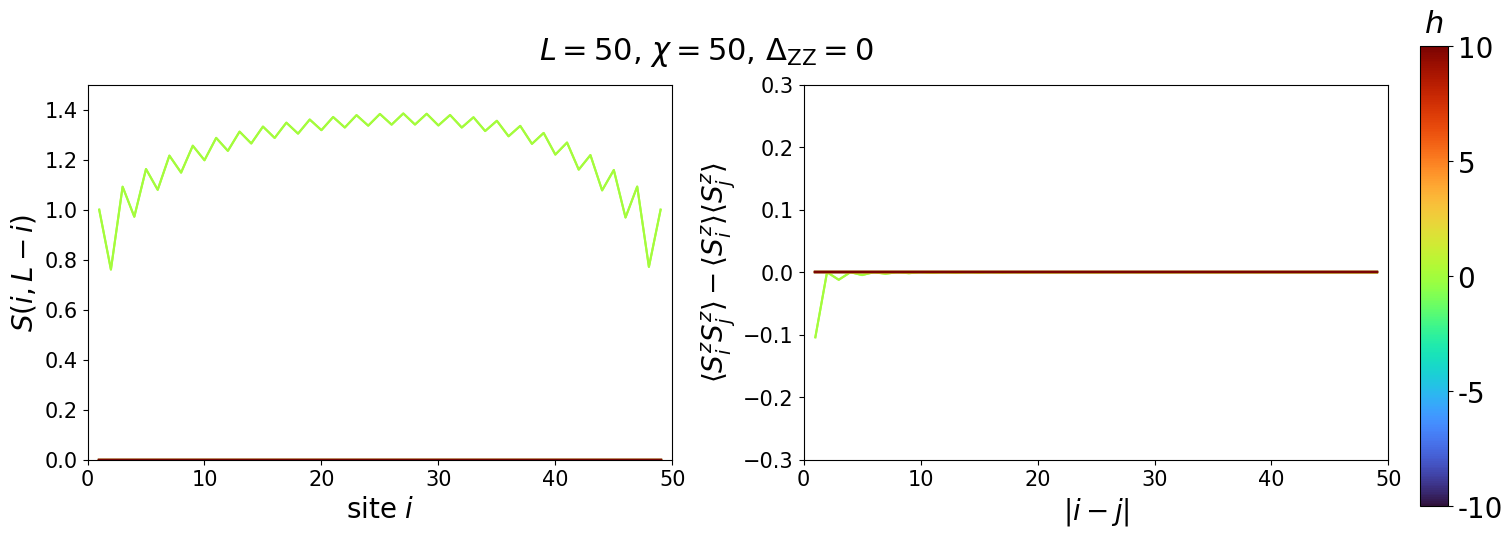

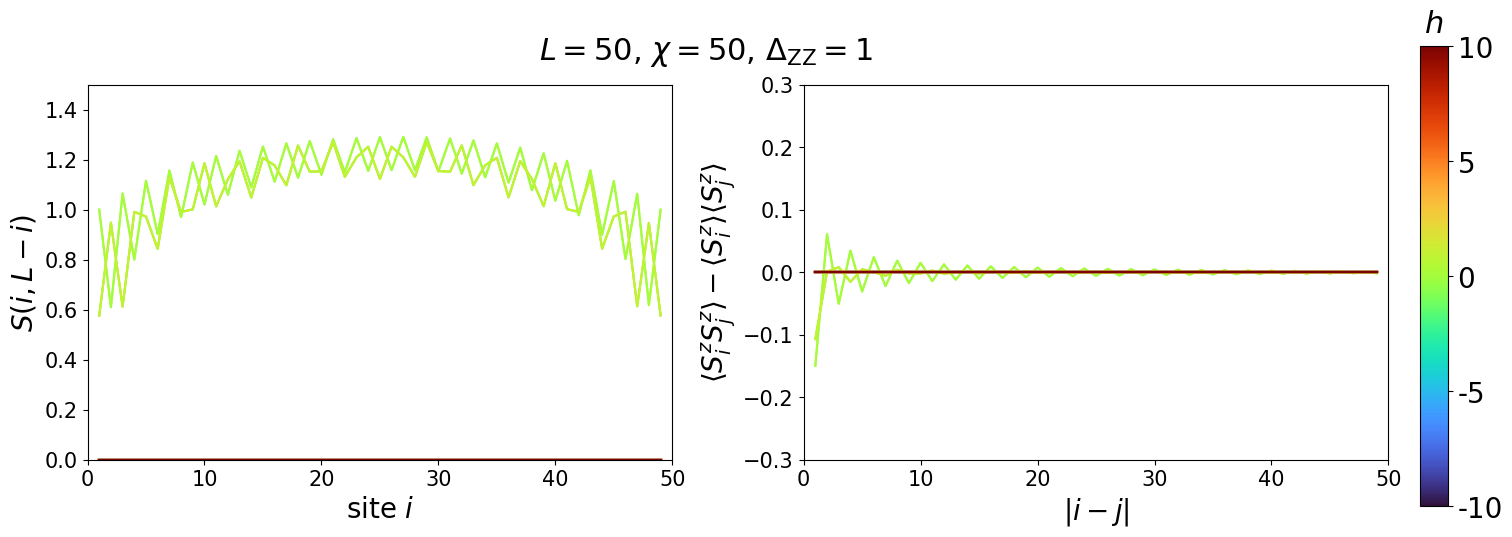

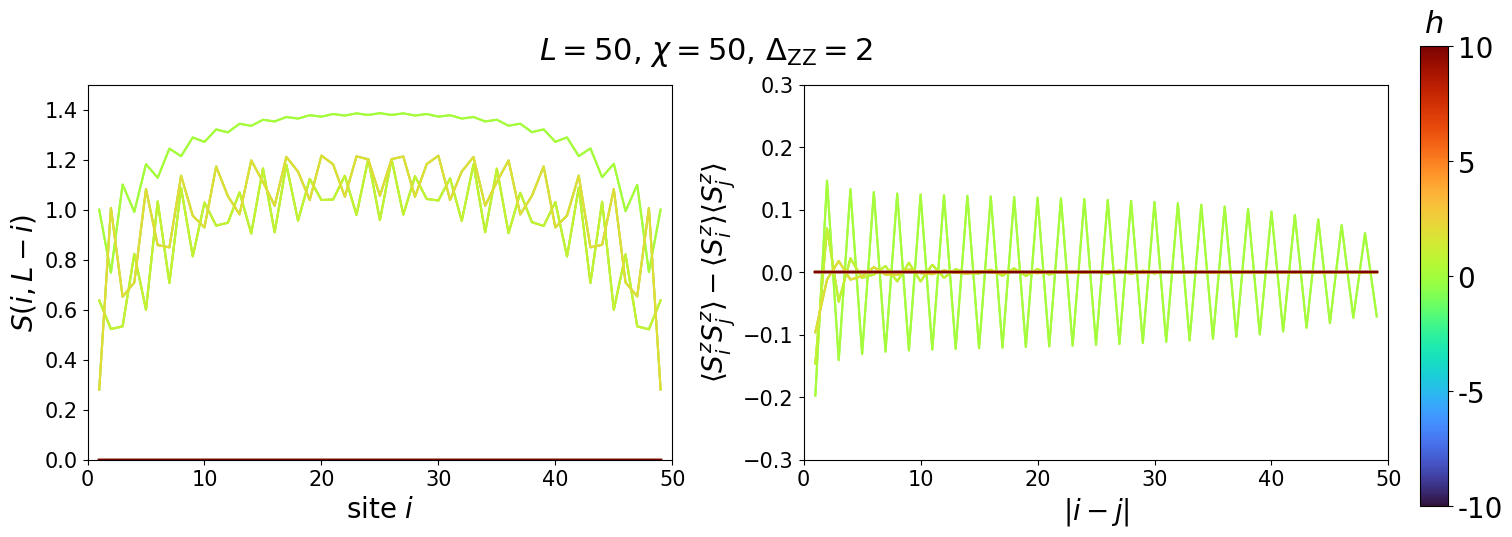

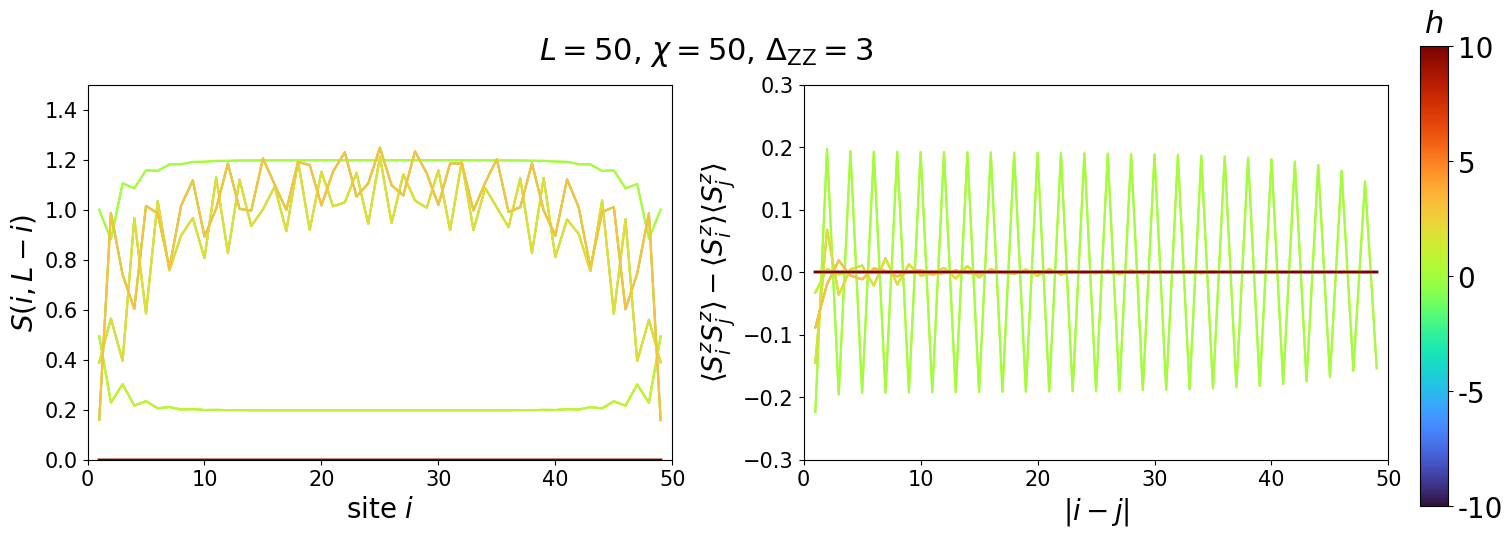

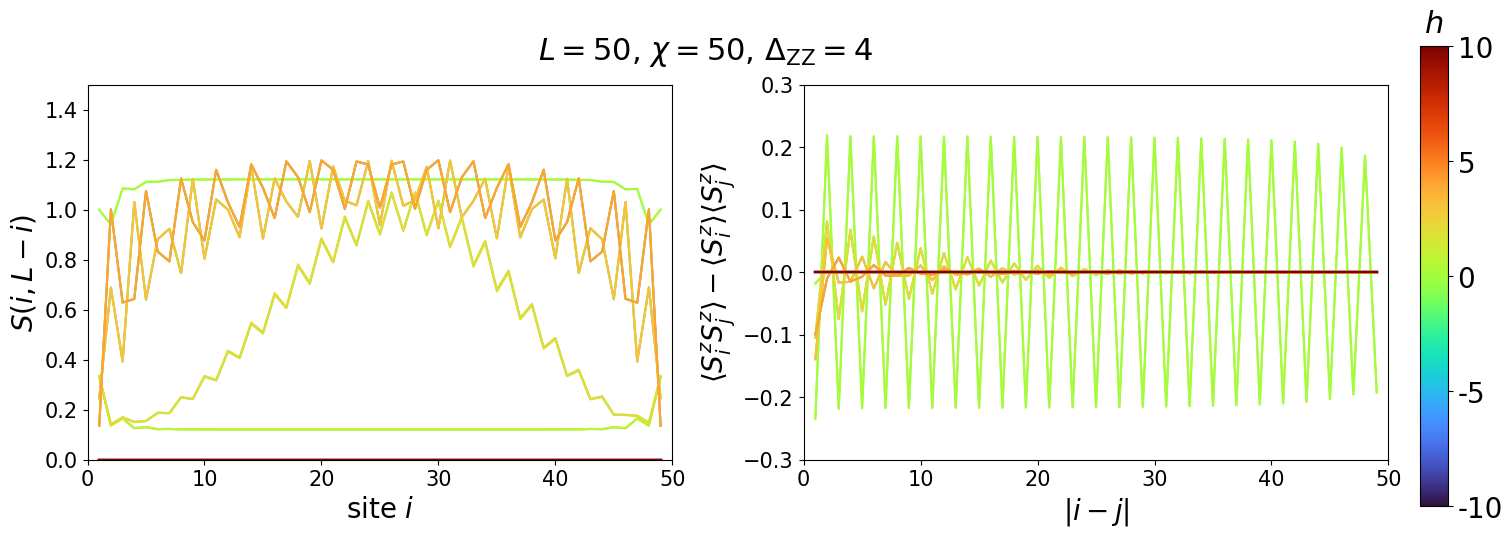

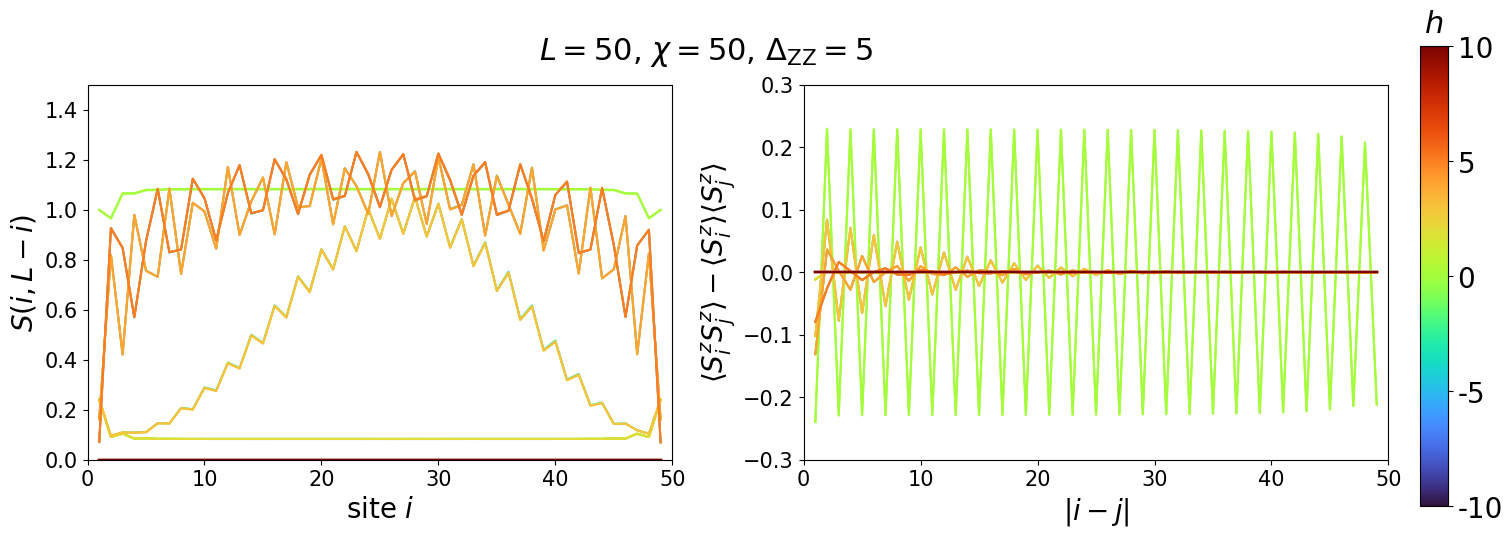

In [17]:
norm = Normalize(-10, 10)

plot_params = np.array([round(-10 + it,2) for it in range(21)])

for value in np.arange(0, 5+1, 1):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)
    
    fig, axs[0] = plot_datas_at_target(
        fig = fig,
        ax = axs[0],
        targets = ZZ,
        params = h,
        plot_params = plot_params,
        datas = Neumann_entropy,
        value = value,
        xlim = (0, L),
        ylim = (0, 1.5),
        norm = norm,
        x_label = r"site $i$",
        y_label = r"$S(i,L-i)$",
        correlation = False,
        # cbar_label = r"U",
        # title = rf"$L={L}$, $\chi={NKeep}$, $\langle n_i\rangle-1={round(value,2)}$",
    )
    
    fig, axs[1] = plot_datas_at_target(
        fig = fig,
        ax = axs[1],
        targets = ZZ,
        params = h,
        plot_params = plot_params,
        datas = spin_correlations,
        value = value,
        xlim = (0, L),
        ylim = (-0.3, 0.3),
        norm = norm,
        x_label = r"$|i-j|$",
        y_label = r"$\langle S_i^zS_j^z\rangle-\langle S_i^z\rangle\langle S_j^z\rangle$",
        correlation = True,
        # cbar_label = r"U",
        # title = rf"$L={L}$, $\chi={NKeep}$, $\langle n_i\rangle-1={round(value,2)}$",
    )
    
    manual_colorbar(
        fig = fig,
        norm = norm,
        position = [1.01, 0.05, 0.02, 0.92],
        cbar_ticks = [-10, -5, 0, 5, 10],
        cbar_ticklabels = [-10, -5, 0, 5, 10],
        colorbar_label = r"$h$",
    )
    
    fig.suptitle(rf"$L={L}$, $\chi={NKeep}$, $\Delta_\mathrm{{ZZ}}={round(value,2)}$", fontsize=22)

    fig.savefig(f"fig/AFM_{round(value,2)}.jpg")

In [18]:
def plot_values_at_target(
    targets,
    params,
    datas,
    norm,
    fig = None,
    ax = None,
    plot_params = None,
    tol: float = 1e-2,
    xlog: bool = False,
    ylog: bool = False,
    title: str | None = None,
    xlim: tuple | None = None,
    ylim: tuple | None = None,
    x_label: str | None = None,
    y_label: str | None = None,
    fontsize: int = 20,
    cbar_label: str | None = None,
):
    # Set up the Turbo colormap and normalization for coloring lines based on param
    cmap = cm.turbo
    # norm = Normalize(vmin=vmin, vmax=vmax)  # Assuming norm is passed correctly
    
    if fig is None or ax is None:
        fig, ax = plt.subplots(constrained_layout=True)

    # xvals = params[np.abs(targets - value) < tol]
    # yvals = datas[np.abs(targets - value) < tol]
    # color = cmap(norm(value))

    for target, param, data in zip(targets, params, datas):
        color = cmap(norm(param))
        
        if plot_params is None:
            ax.errorbar(target, data, fmt="o", linewidth=4, color=color)
        else:
            if param in plot_params:
                ax.errorbar(target, data, fmt="o", linewidth=4, color=color)

    # ax.errorbar(xvals, yvals, fmt="-o", linewidth=4, color=color)

    # Set axis limits
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # Apply log scaling if requested
    if xlog:
        ax.set_xscale("log")
    if ylog:
        ax.set_yscale("log")

    # Set axis labels if provided
    if x_label is not None:
        ax.set_xlabel(x_label, fontsize=fontsize)
    if y_label is not None:
        ax.set_ylabel(y_label, fontsize=fontsize)
    
    if title is not None:
        ax.set_title(title)
    
    # Assuming add_ons is a defined function for additional plot formatting
    fig, ax = add_ons(fig, ax)
    
    return fig, ax



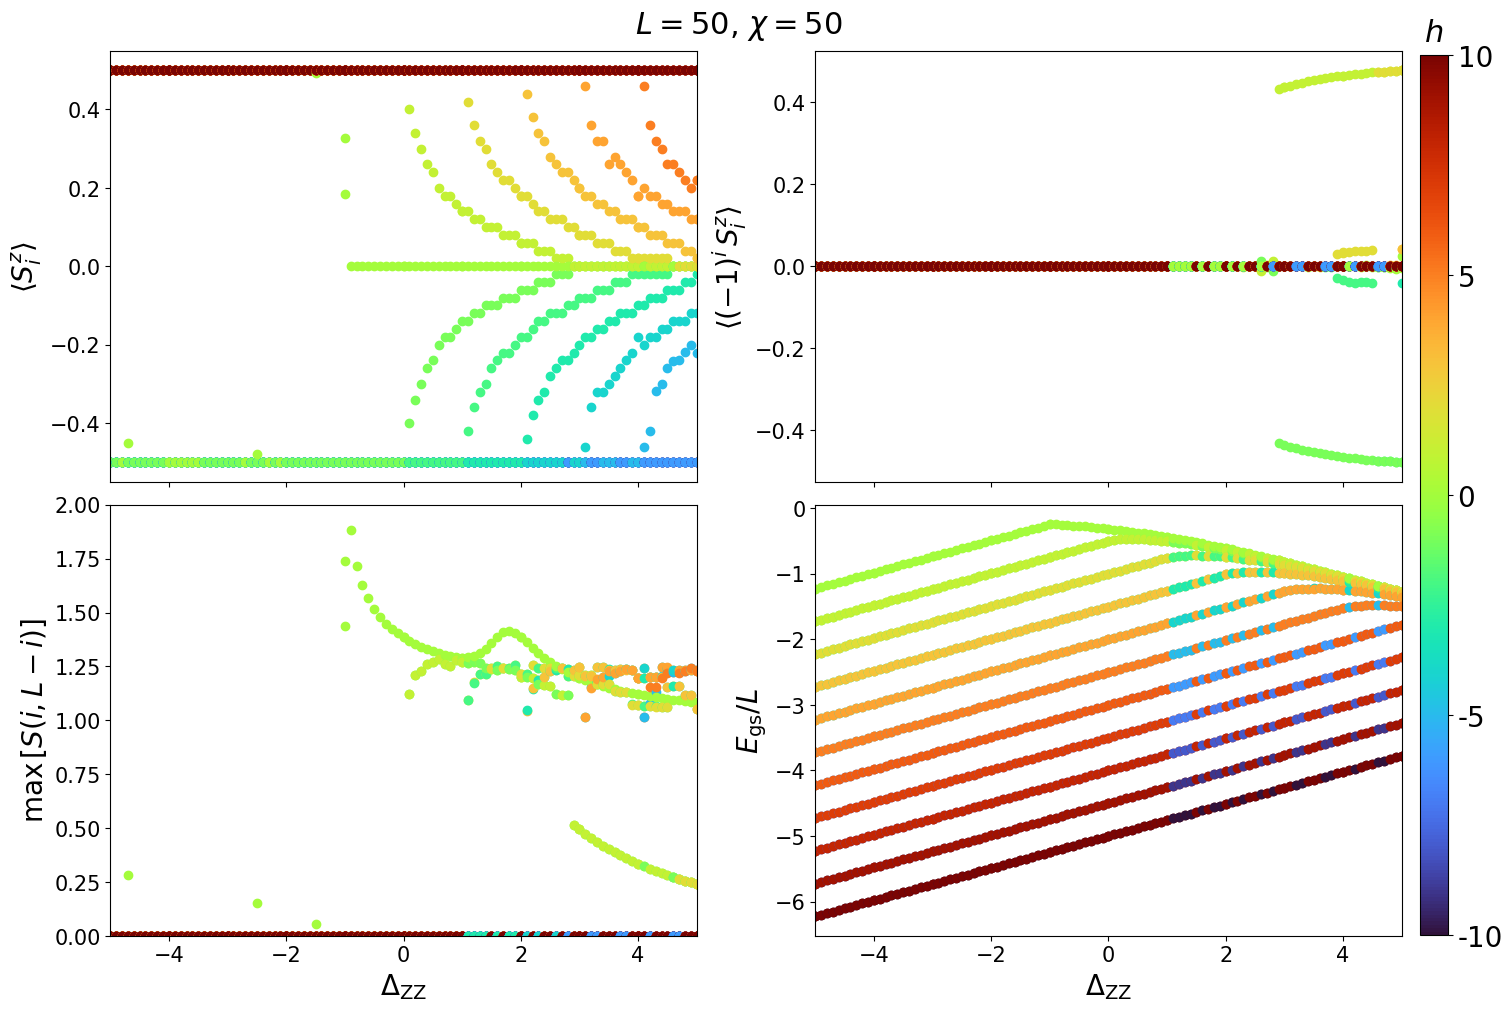

In [19]:
norm = Normalize(-10, 10)

plot_params = np.array([round(-10 + it,2) for it in range(21)])

fig, axs = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True, sharex="col")

fig, axs[0,0] = plot_values_at_target(
    fig = fig,
    ax = axs[0,0],
    targets = ZZ,
    params = h,
    plot_params = plot_params,
    datas = spin_z.mean(axis=1),
    xlim = (-5, 5),
    norm = norm,
    # x_label = r"$\Delta_\mathrm{ZZ}$",
    y_label = r"$\langle S_i^z\rangle$",
    # cbar_label = r"U",
    # title = rf"$L={L}$, $\chi={NKeep}$, $\langle n_i\rangle-1={round(value,2)}$",
)

fig, axs[0,1] = plot_values_at_target(
    fig = fig,
    ax = axs[0,1],
    targets = ZZ,
    params = h,
    plot_params = plot_params,
    datas = alter_spin_z.mean(axis=1),
    xlim = (-5, 5),
    norm = norm,
    # x_label = r"$\Delta_\mathrm{ZZ}$",
    y_label = r"$\langle (-1)^i\,S_i^z\rangle$",
    # cbar_label = r"U",
    # title = rf"$L={L}$, $\chi={NKeep}$, $\langle n_i\rangle-1={round(value,2)}$",
)

fig, axs[1,0] = plot_values_at_target(
    fig = fig,
    ax = axs[1,0],
    targets = ZZ,
    params = h,
    plot_params = plot_params,
    datas = Neumann_entropy.max(axis=1),
    xlim = (-5, 5),
    ylim = (0, 2),
    norm = norm,
    x_label = r"$\Delta_\mathrm{ZZ}$",
    y_label = r"$\mathrm{max}\,\left[S(i,L-i)\right]$",
    # cbar_label = r"U",
    # title = rf"$L={L}$, $\chi={NKeep}$, $\langle n_i\rangle-1={round(value,2)}$",
)

fig, axs[1,1] = plot_values_at_target(
    fig = fig,
    ax = axs[1,1],
    targets = ZZ,
    params = h,
    plot_params = plot_params,
    datas = ground_state_energy / L,
    xlim = (-5, 5),
    norm = norm,
    x_label = r"$\Delta_\mathrm{ZZ}$",
    y_label = r"$E_\mathrm{gs}/L$",
    # cbar_label = r"U",
    # title = rf"$L={L}$, $\chi={NKeep}$, $\langle n_i\rangle-1={round(value,2)}$",
)

manual_colorbar(
    fig = fig,
    norm = norm,
    position = [1.01, 0.07, 0.02, 0.88],
    cbar_ticks = [-10, -5, 0, 5, 10],
    cbar_ticklabels = [-10, -5, 0, 5, 10],
    colorbar_label = r"$h$",
)

fig.suptitle(rf"       $L={L}$, $\chi={NKeep}$", fontsize=22)

fig.savefig(f"fig/AFM_all_{round(value,2)}.jpg")

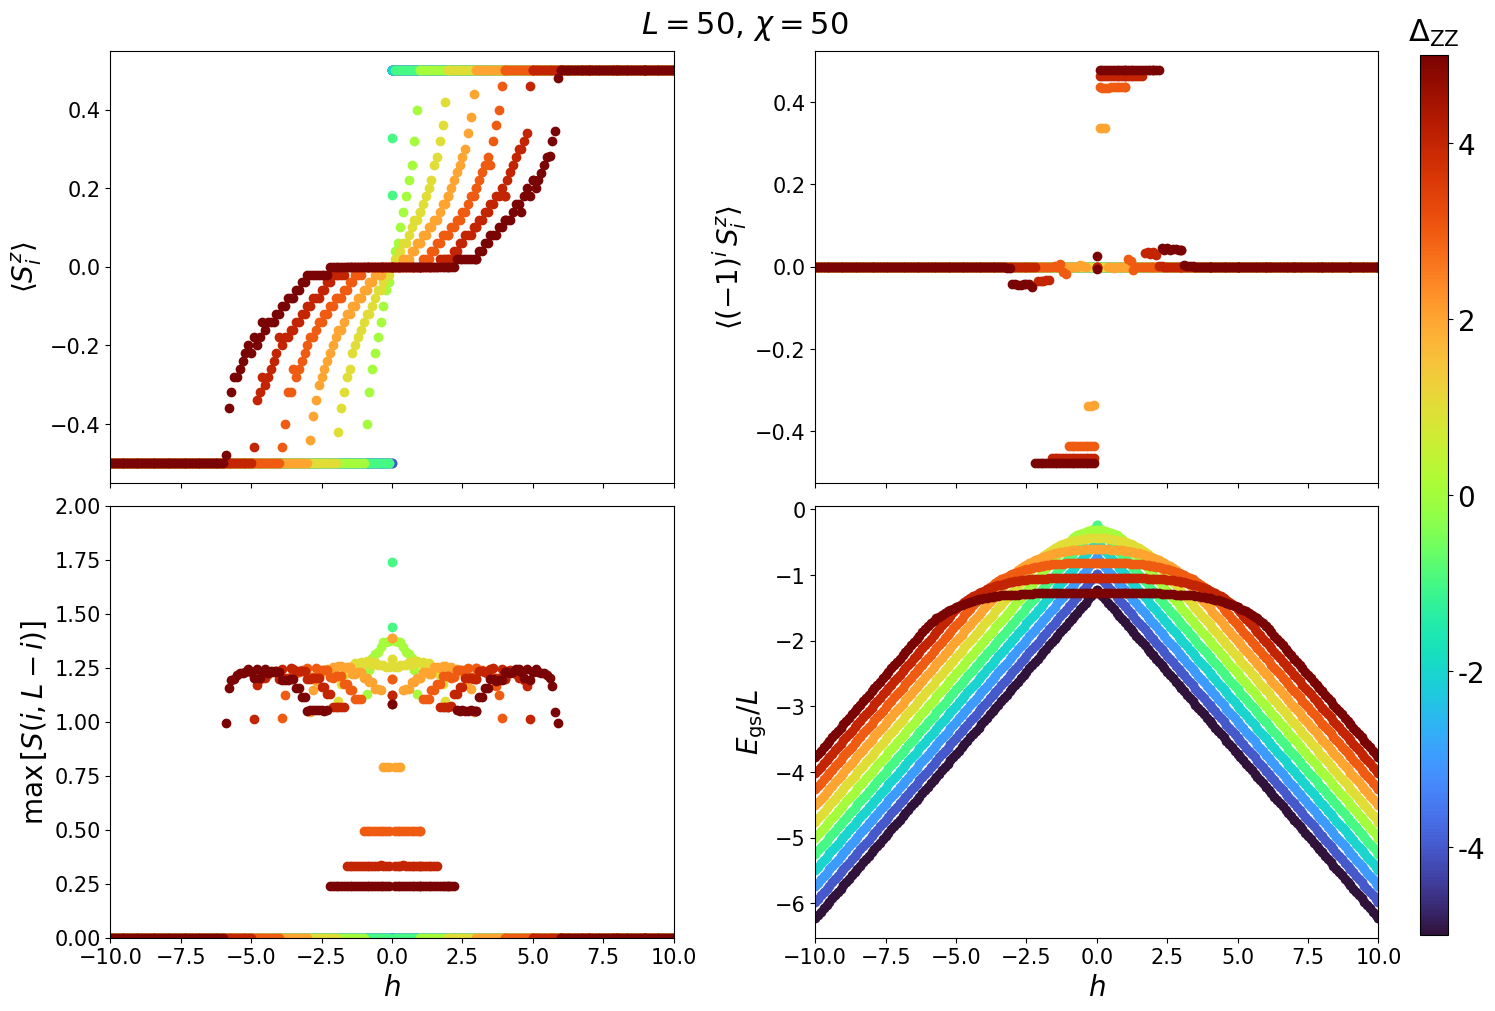

In [20]:
norm = Normalize(-5, 5)
xlim = (-10, 10)

plot_params = np.array([round(-5 + it,2) for it in range(11)])

fig, axs = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True, sharex="col")

fig, axs[0,0] = plot_values_at_target(
    fig = fig,
    ax = axs[0,0],
    targets = h,
    params = ZZ,
    plot_params = plot_params,
    datas = spin_z.mean(axis=1),
    xlim = xlim,
    norm = norm,
    # x_label = r"$h$",
    y_label = r"$\langle S_i^z\rangle$",
    # cbar_label = r"U",
    # title = rf"$L={L}$, $\chi={NKeep}$, $\langle n_i\rangle-1={round(value,2)}$",
)

fig, axs[0,1] = plot_values_at_target(
    fig = fig,
    ax = axs[0,1],
    targets = h,
    params = ZZ,
    plot_params = plot_params,
    datas = alter_spin_z.mean(axis=1),
    xlim = xlim,
    norm = norm,
    # x_label = r"$h$",
    y_label = r"$\langle (-1)^i\,S_i^z\rangle$",
    # cbar_label = r"U",
    # title = rf"$L={L}$, $\chi={NKeep}$, $\langle n_i\rangle-1={round(value,2)}$",
)

fig, axs[1,0] = plot_values_at_target(
    fig = fig,
    ax = axs[1,0],
    targets = h,
    params = ZZ,
    plot_params = plot_params,
    datas = Neumann_entropy.max(axis=1),
    xlim = xlim,
    ylim = (0, 2),
    norm = norm,
    x_label = r"$h$",
    y_label = r"$\mathrm{max}\,\left[S(i,L-i)\right]$",
    # cbar_label = r"U",
    # title = rf"$L={L}$, $\chi={NKeep}$, $\langle n_i\rangle-1={round(value,2)}$",
)

fig, axs[1,1] = plot_values_at_target(
    fig = fig,
    ax = axs[1,1],
    targets = h,
    params = ZZ,
    plot_params = plot_params,
    datas = ground_state_energy / L,
    xlim = xlim,
    norm = norm,
    x_label = r"$h$",
    y_label = r"$E_\mathrm{gs}/L$",
    # cbar_label = r"U",
    # title = rf"$L={L}$, $\chi={NKeep}$, $\langle n_i\rangle-1={round(value,2)}$",
)

manual_colorbar(
    fig = fig,
    norm = norm,
    position = [1.01, 0.07, 0.02, 0.88],
    cbar_ticks = [-4, -2, 0, 2, 4],
    cbar_ticklabels = [-4, -2, 0, 2, 4],
    colorbar_label = r"$\Delta_\mathrm{ZZ}$",
)

fig.suptitle(rf"        $L={L}$, $\chi={NKeep}$", fontsize=22)

fig.savefig(f"fig/AFM_spin_z_energy_{round(value,2)}_2.jpg")

In [21]:
from scipy.optimize import curve_fit

def get_Luttinger_parameters(
    spin_correlations
):
    
    abs_corrs = np.abs(spin_correlations)
    
    Luttinger_coeffs = []
    xlines = np.arange(1, L+1)
    
    def inverse_poly(x, a):
        return (1/x)**a
    
    for abs_corr in abs_corrs:
        
        params, _ = curve_fit(inverse_poly, xlines, abs_corr)
        if abs_corr.min() > 1e-15:
            Luttinger_coeffs.append(2*params[0])
        else:
            Luttinger_coeffs.append(0)

    Luttinger_coeffs = np.array(Luttinger_coeffs)
    
    return Luttinger_coeffs


def get_correlation_length(
    correlations
):
    abs_corrs = np.abs(correlations)
    
    coeffs = []
    xlines = np.arange(1, L+1)
    
    def inverse_poly(x, a):
        return -x/a
    
    for abs_corr in abs_corrs:
        
        try:
            params, _ = curve_fit(inverse_poly, xlines, np.log(abs_corr))
        except Exception as e:
            params = [0]
        
        coeffs.append(params[0])

    coeffs = np.array(coeffs)
    
    return coeffs
    
    

In [22]:
spin_correlations[0]

array([-7.50000000e-01+0.j,  1.33226763e-15+0.j,  1.33226763e-15+0.j,
        1.33226763e-15+0.j,  1.33226763e-15+0.j,  1.33226763e-15+0.j,
        1.33226763e-15+0.j,  1.33226763e-15+0.j,  1.33226763e-15+0.j,
        1.33226763e-15+0.j,  1.33226763e-15+0.j,  1.33226763e-15+0.j,
        1.33226763e-15+0.j,  1.33226763e-15+0.j,  1.33226763e-15+0.j,
        1.33226763e-15+0.j,  1.33226763e-15+0.j,  1.33226763e-15+0.j,
        1.33226763e-15+0.j,  1.33226763e-15+0.j,  1.33226763e-15+0.j,
        1.33226763e-15+0.j,  1.33226763e-15+0.j,  1.33226763e-15+0.j,
        1.33226763e-15+0.j,  1.33226763e-15+0.j,  1.33226763e-15+0.j,
        1.33226763e-15+0.j,  1.33226763e-15+0.j,  1.33226763e-15+0.j,
        1.33226763e-15+0.j,  1.33226763e-15+0.j,  1.33226763e-15+0.j,
        1.33226763e-15+0.j,  1.33226763e-15+0.j,  1.33226763e-15+0.j,
        1.33226763e-15+0.j,  1.33226763e-15+0.j,  1.33226763e-15+0.j,
        1.33226763e-15+0.j,  1.33226763e-15+0.j,  1.33226763e-15+0.j,
        1.33226763e-

In [23]:
Lutting_params_full = get_Luttinger_parameters(spin_correlations)

data_grid min: -2.9281841967957416e-13 max: 32.968423155344155
Any NaN in data_grid?: False


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='$\\Delta_\\mathrm{ZZ}$', ylabel='$h$'>)

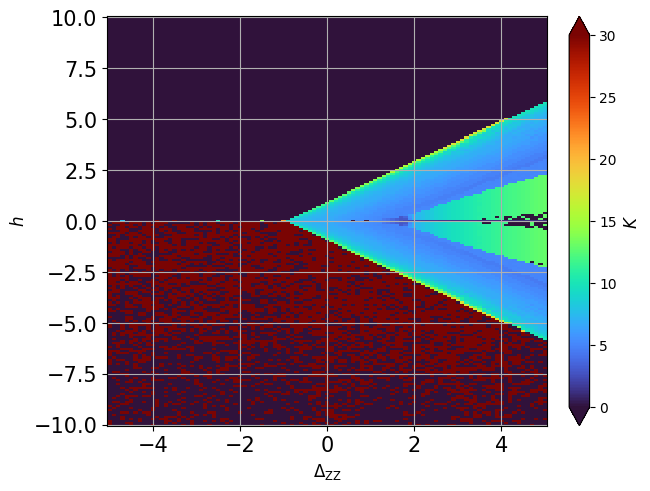

In [24]:
vmin = 0
vmax = 30

x_label = r'$\Delta_\mathrm{ZZ}$'
y_label = r'$h$'
cbar_label = r'$K$'

plot_pcolormesh(
    xdata = ZZ,
    ydata = h,
    plotdata = Lutting_params_full,
    vmin = vmin,
    vmax = vmax,
    x_label = x_label,
    y_label = y_label,
    cbar_label = cbar_label,
)

In [25]:
half_filling_coeffs = spin_correlations[np.abs(h) == 0]
half_filling_ZZs = ZZ[np.abs(h) == 0]

Lutting_params = get_Luttinger_parameters(half_filling_coeffs)

/tmp/ipykernel_11074/2949638883.py:14: RuntimeWarning: divide by zero encountered in divide
  return 6*np.pi/(2*np.arccos(-xs))


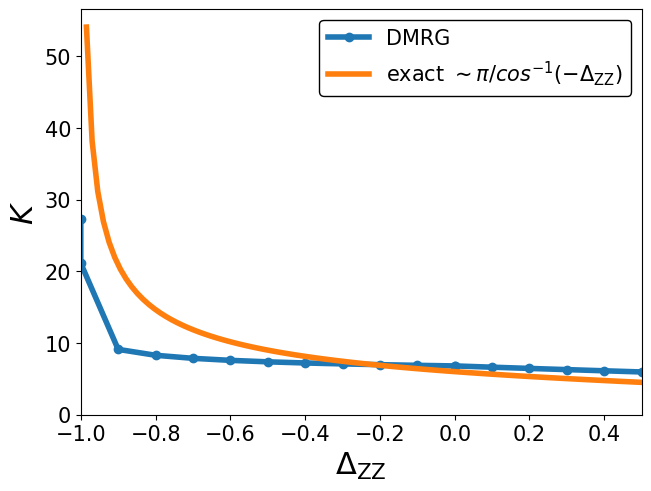

In [29]:
Lutting_params = Lutting_params[-1 <= half_filling_ZZs]
half_filling_ZZs = half_filling_ZZs[-1 <= half_filling_ZZs]

Lutting_params = Lutting_params[half_filling_ZZs <= 0.5]
half_filling_ZZs = half_filling_ZZs[half_filling_ZZs <= 0.5]

fig, ax = plt.subplots(constrained_layout=True)

ax.errorbar(half_filling_ZZs, Lutting_params, fmt="-o", linewidth=4, label="DMRG")

xlinspace = np.linspace(-1, 0.5, 100)

def function(xs):
    return 6*np.pi/(2*np.arccos(-xs))

ax.errorbar(xlinspace, function(xlinspace), linewidth=4, label=r"exact $\sim \pi/cos^{-1}(-\Delta_\mathrm{ZZ})$")

ax.set_xlabel(r"$\Delta_\mathrm{ZZ}$", fontsize=22)
ax.set_ylabel(r"$K$", fontsize=22)

ax.set_xlim(-1, 0.5)
ax.set_ylim(0, None)

fig, ax = add_ons(fig, ax, show_legend=True)

In [ ]:
Lutting_params = Lutting_params[-1 <= half_filling_ZZs]
half_filling_ZZs = half_filling_ZZs[-1 <= half_filling_ZZs]

Lutting_params = Lutting_params[half_filling_ZZs <= 0.5]
half_filling_ZZs = half_filling_ZZs[half_filling_ZZs <= 0.5]

fig, ax = plt.subplots(constrained_layout=True)

ax.errorbar(half_filling_ZZs, Lutting_params, fmt="-o", linewidth=4, label="DMRG")

xlinspace = np.linspace(-1, 0.5, 100)

def function(xs):
    return 6*np.pi/(2*np.arccos(-xs))

ax.errorbar(xlinspace, function(xlinspace), linewidth=4, label=r"exact $\sim \pi/cos^{-1}(-\Delta_\mathrm{ZZ})$")

ax.set_xlabel(r"$\Delta_\mathrm{ZZ}$", fontsize=22)
ax.set_ylabel(r"$K$", fontsize=22)

ax.set_xlim(-1, 0.5)
ax.set_ylim(0, None)

fig, ax = add_ons(fig, ax, show_legend=True)


Lutting_params = Lutting_params[-1 <= half_filling_ZZs]
half_filling_ZZs = half_filling_ZZs[-1 <= half_filling_ZZs]

Lutting_params = Lutting_params[half_filling_ZZs <= 0.5]
half_filling_ZZs = half_filling_ZZs[half_filling_ZZs <= 0.5]

fig, ax = plt.subplots(constrained_layout=True)

ax.errorbar(half_filling_ZZs, Lutting_params, fmt="-o", linewidth=4, label="DMRG")

xlinspace = np.linspace(-1, 0.5, 100)

def function(xs):
    return 6*np.pi/(2*np.arccos(-xs))

ax.errorbar(xlinspace, function(xlinspace), linewidth=4, label=r"exact $\sim \pi/cos^{-1}(-\Delta_\mathrm{ZZ})$")

ax.set_xlabel(r"$\Delta_\mathrm{ZZ}$", fontsize=22)
ax.set_ylabel(r"$K$", fontsize=22)

ax.set_xlim(-1, 0.5)
ax.set_ylim(0, None)

fig, ax = add_ons(fig, ax, show_legend=True)